In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Medicaldataset.csv")
df.head()


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


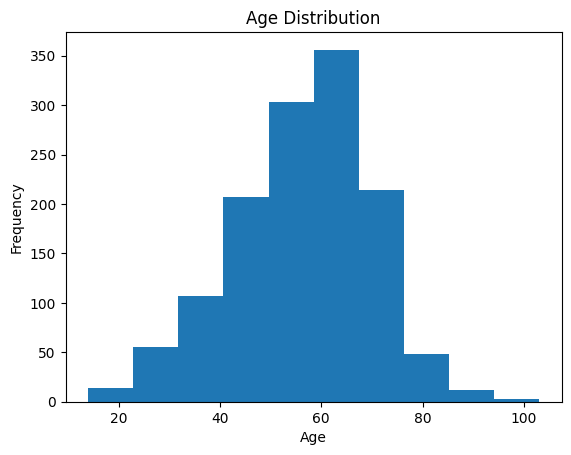

In [2]:

# Plot some relationships
plt.figure()
df['Age'].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convert Result to numeric labels
df["Result"] = df["Result"].map({"positive": 1, "negative": 0})

# Features and target
X = df.drop("Result", axis=1)
y = df["Result"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9810606060606061

In [5]:
# User input prediction
import pandas as pd

print("Enter patient features:")

user_data = {}
for col in X.columns:
    # Special input for Gender
    if col.lower() == "gender":
        val = int(input("Enter Gender (male = 1 / female = 0): "))
    else:
        val = float(input(f"Enter {col}: "))
    user_data[col] = val

user_df = pd.DataFrame([user_data])
prediction = model.predict(user_df)[0]

# Print prediction
if prediction == 1:
    print("Prediction: Heart Attack (1 = Heart Attack): 1")
else:
    print("Prediction: No Heart Attack (0 = No Heart Attack): 0")
    

Enter patient features:


Enter Age:  21
Enter Gender (male = 1 / female = 0):  0
Enter Heart rate:  76
Enter Systolic blood pressure:  120
Enter Diastolic blood pressure:  90
Enter Blood sugar:  45
Enter CK-MB:  15
Enter Troponin:  0.1


Prediction: Heart Attack (1 = Heart Attack)
1
